<a href="https://colab.research.google.com/github/Um333r/Neural-Networks-Gas_turbines/blob/master/Neural_Network_Gas_turbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network Assignment**


Data Set - Gas_turbines

1. Import Necessary libraries

In [39]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2. Import Data


In [37]:
turbines_data = pd.read_csv('/content/gas_turbines.csv')
turbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


3. Data Understanding

3.1 Initial Analysis :

In [40]:
turbines_data.head()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [41]:
turbines_data.shape


(15039, 11)

In [42]:
turbines_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [43]:
turbines_data.isna().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [44]:
turbines_data.describe()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [45]:
turbines_data.dtypes


AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

3.2 Correlation Matrix :


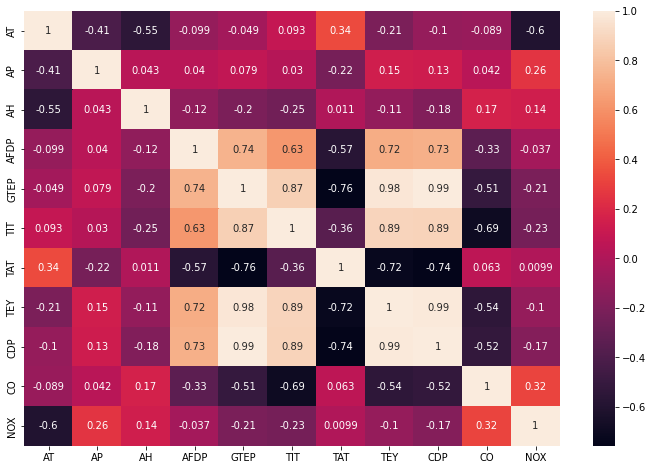

In [46]:
plt.figure(figsize = (12,8))
sns.heatmap(turbines_data.corr(),annot = True)
plt.show()

3.3 Visualization using distplot :


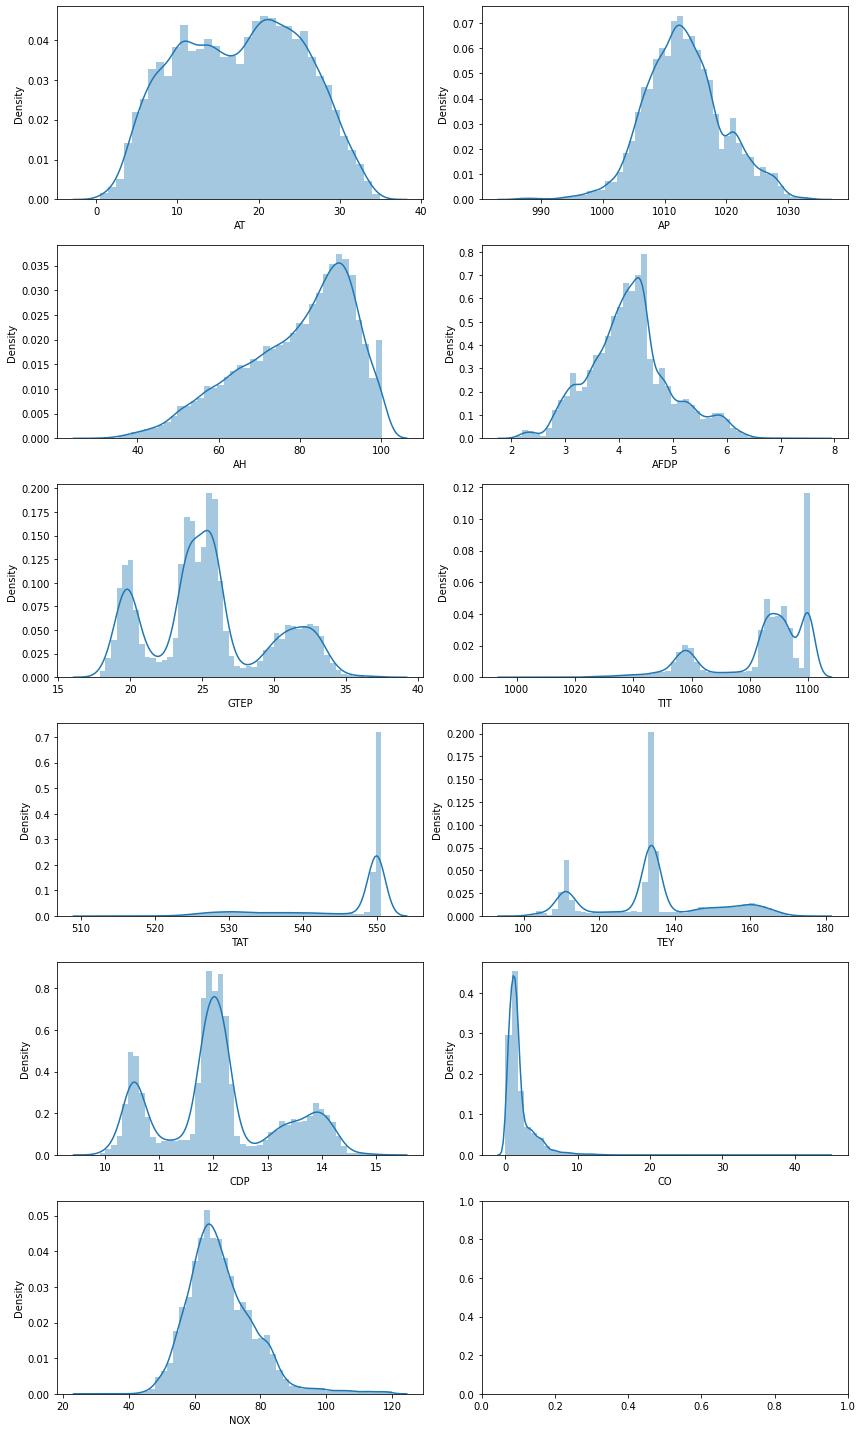

In [47]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(turbines_data.AT, ax = ax[0,0])
sns.distplot(turbines_data.AP, ax = ax[0,1])
sns.distplot(turbines_data.AH, ax = ax[1,0])
sns.distplot(turbines_data.AFDP, ax = ax[1,1])
sns.distplot(turbines_data.GTEP, ax = ax[2,0])
sns.distplot(turbines_data.TIT, ax = ax[2,1])
sns.distplot(turbines_data.TAT, ax = ax[3,0])
sns.distplot(turbines_data.TEY, ax = ax[3,1])
sns.distplot(turbines_data.CDP, ax = ax[4,0])
sns.distplot(turbines_data.CO, ax = ax[4,1])
sns.distplot(turbines_data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

3.4 Checking of the outlier :


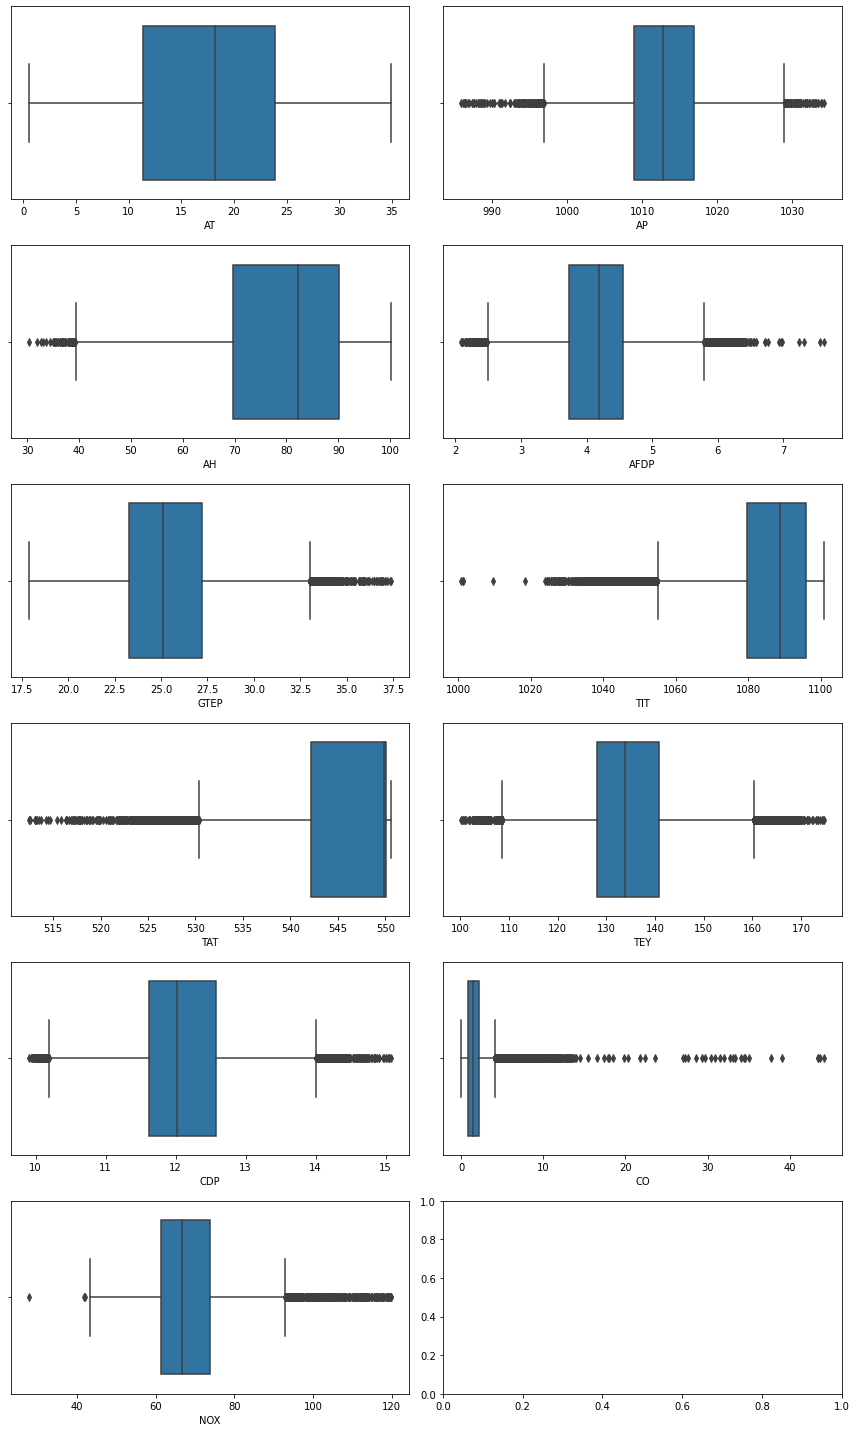

In [48]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.boxplot(turbines_data.AT, ax = ax[0,0])
sns.boxplot(turbines_data.AP, ax = ax[0,1])
sns.boxplot(turbines_data.AH, ax = ax[1,0])
sns.boxplot(turbines_data.AFDP, ax = ax[1,1])
sns.boxplot(turbines_data.GTEP, ax = ax[2,0])
sns.boxplot(turbines_data.TIT, ax = ax[2,1])
sns.boxplot(turbines_data.TAT, ax = ax[3,0])
sns.boxplot(turbines_data.TEY, ax = ax[3,1])
sns.boxplot(turbines_data.CDP, ax = ax[4,0])
sns.boxplot(turbines_data.CO, ax = ax[4,1])
sns.boxplot(turbines_data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()


4. Extrating the independent and dependent variables

In [49]:
turbines_data["TEy"] = 1
turbines_data.loc[turbines_data["TEY"] > 135,"TEy"] = 2
turbines_data.drop(["TEY"],axis = 1,inplace = True)

In [50]:
x = np.array(turbines_data.iloc[:,0:10])
x

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [51]:
y = np.array(turbines_data.iloc[:,10])
y

array([1, 1, 1, ..., 1, 1, 1])

4.1 Normalizing data :


In [52]:
from sklearn.model_selection import train_test_split


In [53]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [54]:
x_norm = norm_func(x)


4.2 Data Splitting :


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y, test_size = 0.2)


4.3 Applying Neural Network :



In [56]:
import keras.models
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [57]:
model = Sequential()


In [58]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [59]:
model.add(Dense(8, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(4,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [60]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model.fit(x_train,y_train, validation_split = 0.3, epochs = 50, batch_size = 10)


Epoch 1/50
843/843 [==============================] - 3s 2ms/step - loss: 1.0968 - accuracy: 0.2330 - val_loss: 0.5572 - val_accuracy: 0.7039
Epoch 2/50
843/843 [==============================] - 2s 2ms/step - loss: 0.3549 - accuracy: 0.7032 - val_loss: 0.2419 - val_accuracy: 0.7039
Epoch 3/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2188 - accuracy: 0.7032 - val_loss: 0.2093 - val_accuracy: 0.7039
Epoch 4/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2090 - accuracy: 0.7032 - val_loss: 0.2084 - val_accuracy: 0.7039
Epoch 5/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2087 - accuracy: 0.7032 - val_loss: 0.2085 - val_accuracy: 0.7039
Epoch 6/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2085 - val_accuracy: 0.7039
Epoch 7/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2085 - val_accuracy: 0.7039
Epoch 

In [ ]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


376/376 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.7040
accuracy: 70.40%


In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


94/94 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.7021
accuracy: 70.21%


4.4 Visualize training history :


In [ ]:
history = model.fit(x_train,y_train, validation_split = 0.3, epochs = 50, batch_size = 10)


Epoch 1/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2085 - val_accuracy: 0.7039
Epoch 2/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2085 - val_accuracy: 0.7039
Epoch 3/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2087 - accuracy: 0.7032 - val_loss: 0.2087 - val_accuracy: 0.7039
Epoch 4/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2089 - accuracy: 0.7032 - val_loss: 0.2084 - val_accuracy: 0.7039
Epoch 5/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2084 - val_accuracy: 0.7039
Epoch 6/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2084 - val_accuracy: 0.7039
Epoch 7/50
843/843 [==============================] - 2s 2ms/step - loss: 0.2088 - accuracy: 0.7032 - val_loss: 0.2085 - val_accuracy: 0.7039
Epoch 

In [ ]:
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4.5 summarize history for accuracy and Loss :

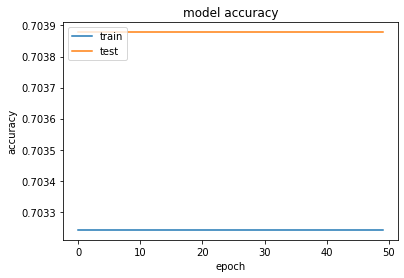

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

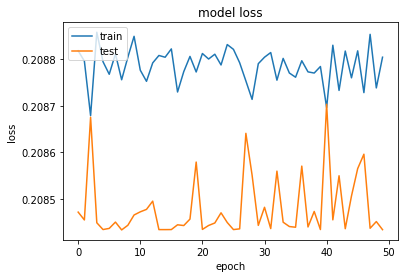

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

5. Tuning of Hyperparameter : Batch Size and Epochs

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])
    return model

5.1 Create the model :


In [ ]:
model_1 = KerasClassifier(build_fn = create_model,verbose = 0)


5.2 Define the grid search parameters :


In [ ]:
batch_size = [10,20,40]
epochs = [10,50,100]

5.3 Make a dictionary of the grid search parameters

In [ ]:
param_grid = dict(batch_size = batch_size,epochs = epochs)


5.4 Build and fit the GridSearchCV :


In [38]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.692 total time=  21.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.694 total time=  21.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.720 total time=  12.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.700 total time=  11.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.711 total time=  12.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

**Conclusion :**

 For Train Model we got 70.40% Accuracy

 For Test Model we got 70.21% Accuracy